In [14]:
%matplotlib inline


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from lls import LinearLeastSquare

In [16]:
data = pd.read_csv('Dataset\HousePrice.csv')
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [17]:
data.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [18]:
del data['Price']
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price(USD)
0,63,1,True,True,True,Shahran,61666.67
1,60,1,True,True,True,Shahran,61666.67
2,79,2,True,True,True,Pardis,18333.33
3,95,2,True,True,True,Shahrake Qods,30083.33
4,123,2,True,True,True,Shahrake Gharb,233333.33
...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,116666.67
3475,83,2,True,True,True,Niavaran,226666.67
3476,75,2,False,False,False,Parand,12166.67
3477,105,2,True,True,True,Dorous,186666.67


In [19]:
data['Price'] = data['Price(USD)'] * 49000
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price(USD),Price
0,63,1,True,True,True,Shahran,61666.67,3.021667e+09
1,60,1,True,True,True,Shahran,61666.67,3.021667e+09
2,79,2,True,True,True,Pardis,18333.33,8.983332e+08
3,95,2,True,True,True,Shahrake Qods,30083.33,1.474083e+09
4,123,2,True,True,True,Shahrake Gharb,233333.33,1.143333e+10
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,116666.67,5.716667e+09
3475,83,2,True,True,True,Niavaran,226666.67,1.110667e+10
3476,75,2,False,False,False,Parand,12166.67,5.961668e+08
3477,105,2,True,True,True,Dorous,186666.67,9.146667e+09


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price(USD)  3479 non-null   float64
 7   Price       3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [21]:
data['Area'] = data['Area'].apply(lambda x: re.sub(',', '', x))
data['Area'] = data["Area"].astype(np.int64)

data

,Area,Room,Parking,Warehouse,Elevator,Address,Price(USD),Price
0,63,1,True,True,True,Shahran,61666.67,3.021667e+09
1,60,1,True,True,True,Shahran,61666.67,3.021667e+09
2,79,2,True,True,True,Pardis,18333.33,8.983332e+08
3,95,2,True,True,True,Shahrake Qods,30083.33,1.474083e+09
4,123,2,True,True,True,Shahrake Gharb,233333.33,1.143333e+10
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,116666.67,5.716667e+09
3475,83,2,True,True,True,Niavaran,226666.67,1.110667e+10
3476,75,2,False,False,False,Parand,12166.67,5.961668e+08
3477,105,2,True,True,True,Dorous,186666.67,9.146667e+09


In [22]:
data.dtypes

Area            int64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price(USD)    float64
Price         float64
dtype: object

In [23]:
data.isnull().sum()
data.dropna(inplace=True)


In [24]:
data.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price(USD)    0
Price         0
dtype: int64

In [25]:
df_address = data.groupby(['Address'])['Price'].sum().sort_values(ascending=False).head().reset_index()
df_address[:5]


,Address,Price
0,Gheitarieh,2.466595e+12
1,Niavaran,2.209472e+12
2,Saadat Abad,1.999282e+12
3,Farmanieh,1.947399e+12
4,Shahrake Gharb,1.153498e+12


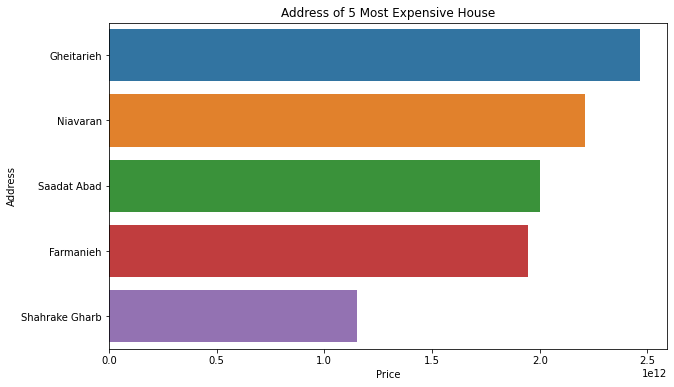

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=df_address['Price'], y=df_address['Address'],ax=ax)
plt.title('Address of 5 Most Expensive House')
plt.show()

In [27]:
del data['Price(USD)']
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,3.021667e+09
1,60,1,True,True,True,Shahran,3.021667e+09
2,79,2,True,True,True,Pardis,8.983332e+08
3,95,2,True,True,True,Shahrake Qods,1.474083e+09
4,123,2,True,True,True,Shahrake Gharb,1.143333e+10
...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,5.716667e+09
3475,83,2,True,True,True,Niavaran,1.110667e+10
3476,75,2,False,False,False,Parand,5.961668e+08
3477,105,2,True,True,True,Dorous,9.146667e+09


In [28]:
boolean_features = ['Parking','Warehouse','Elevator']
data[boolean_features] = data[boolean_features].astype('int64')

data

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,3.021667e+09
1,60,1,1,1,1,Shahran,3.021667e+09
2,79,2,1,1,1,Pardis,8.983332e+08
3,95,2,1,1,1,Shahrake Qods,1.474083e+09
4,123,2,1,1,1,Shahrake Gharb,1.143333e+10
...,...,...,...,...,...,...,...
3474,86,2,1,1,1,Southern Janatabad,5.716667e+09
3475,83,2,1,1,1,Niavaran,1.110667e+10
3476,75,2,0,0,0,Parand,5.961668e+08
3477,105,2,1,1,1,Dorous,9.146667e+09


In [29]:
data.dtypes

Area           int64
Room           int64
Parking        int64
Warehouse      int64
Elevator       int64
Address       object
Price        float64
dtype: object

In [30]:
cols = list(data.columns)

cols

['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price']

In [31]:
X = np.array((data["Area"] , data["Room"] , data["Parking"] , data["Elevator"],data['Warehouse'])).T
Y = np.array((data['Price']))
Y = Y.reshape(-1,1)
X.shape

(3456, 5)

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2592, 5)
(2592, 1)
(864, 5)
(864, 1)


In [33]:
lls = LinearLeastSquare()
lls.fit(X_train,Y_train)

In [34]:
Y_pred = lls.predict(X_test)

In [35]:
MAE = lls.evaluate(X_test,Y_test,metric='mae')
MSE = lls.evaluate(X_test,Y_test,metric='mse')
RMSE = lls.evaluate(X_test,Y_test,metric='rmse')

print('Mean Absolute Error:',MAE)
print('Mean Square Error:',MSE)
print('Root Mean Square Error:',RMSE)

Mean Absolute Error: 6570677625.471226
Mean Square Error: 1.1967126212290668e+20
Root Mean Square Error: 10939436097.117012


Scikit-Learn's Linear Regression

In [39]:
reg = LinearRegression()
reg.fit(X_train,Y_train)
Y_pred_regression = reg.predict(X_test)

In [40]:
MAE_regression = np.sum(np.abs(Y_test - Y_pred_regression)) / len(Y_test)
MSE_regression = np.sum((Y_test - Y_pred_regression) ** 2) / len(Y_test)
RMSE_regression = np.sqrt(np.sum((Y_test - Y_pred_regression) ** 2) / len(Y_test))

print('Mean Absolute Error:',MAE_regression)
print('Mean Square Error:',MSE_regression)
print('Root Mean Square Error:',RMSE_regression)

Mean Absolute Error: 6463562811.979165
Mean Square Error: 1.054555001571542e+20
Root Mean Square Error: 10269152845.154959


In [43]:
ridgecv = RidgeCV()
ridgecv.fit(X_train,Y_train)
Y_pred_ridgecv = ridgecv.predict(X_test)

In [51]:
MAE_ridgecv = np.sum(np.abs(Y_test - Y_pred_ridgecv)) / len(Y_test)
MSE_ridgecv = np.sum((Y_test - Y_pred_ridgecv) ** 2) / len(Y_test)
RMSE_ridgecv = np.sqrt(np.sum((Y_test - Y_pred_ridgecv) ** 2) / len(Y_test))

print('Mean Absolute Error:',MAE_regression)
print('Mean Square Error:',MSE_regression)
print('Root Mean Square Error:',RMSE_regression)

Mean Absolute Error: 6463562811.979165
Mean Square Error: 1.054555001571542e+20
Root Mean Square Error: 10269152845.154959


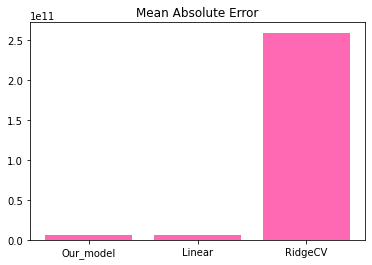

In [62]:
plt.bar(['Our_model','Linear','RidgeCV'],[MAE,MAE_regression,MAE_ridgecv],color='hotpink')
plt.title('Mean Absolute Error')
plt.show()

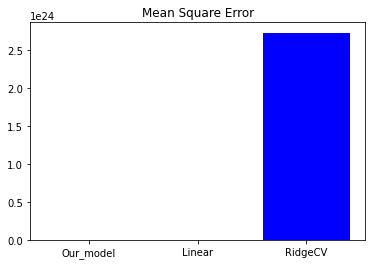

In [66]:
plt.bar(['Our_model','Linear','RidgeCV'],[MSE,MSE_regression,MSE_ridgecv],color='blue')
plt.title('Mean Square Error')
plt.show()

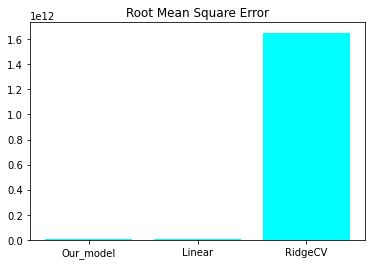

In [65]:
plt.bar(['Our_model','Linear','RidgeCV'],[RMSE,RMSE_regression,RMSE_ridgecv],color='cyan')
plt.title('Root Mean Square Error')
plt.show()